<a href="https://colab.research.google.com/github/rodrigomouracbs/Machine-Learning/blob/main/ML_OverFitting_e_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*Teste de Overfitting*##

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Over and UnderFitting.jpg to Over and UnderFitting.jpg


In [8]:
dataset = pd.read_csv('/content/data.csv', sep=',')
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Separa a classe dos dados:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)

In [9]:
# Pré-Processamento:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [10]:
# Remove features
remove_features(['id','song_title'])

0

In [11]:
# Visualizando o dataset
dataset.artist.head(10)

0              Future
1    Childish Gambino
2              Future
3         Beach House
4         Junior Boys
5               Drake
6               Drake
7               Omega
8         Death Grips
9         Honey Claws
Name: artist, dtype: object

In [12]:
# Transformando as variáveis categóricas:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
inteiros = enc.fit_transform(dataset['artist'])

In [13]:
# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros
remove_features(['artist'])
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,628


In [18]:
# Utiliza a função train_test_split para separar conjunto de treino e teste em 80/20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.2, random_state=123)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics

In [16]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(dataset,classes)

In [19]:
#Escalonamento dos dados de treino e de teste
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

scaler2 = StandardScaler().fit(x_test)
x_test = scaler2.transform(x_test)

In [20]:
#Treina o algoritmo
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
#Realizando as predições
y_pred = clf.predict(x_test)

In [24]:
#Imprime a acurácia
metrics.accuracy_score(y_test,y_pred)

0.995049504950495

In [25]:
#Testando a classificação com os dados de treinamento
#Realizando as predições
y_pred=clf.predict(x_train)

In [26]:
#Imprime a Acurácia
metrics.accuracy_score(y_train,y_pred)

1.0

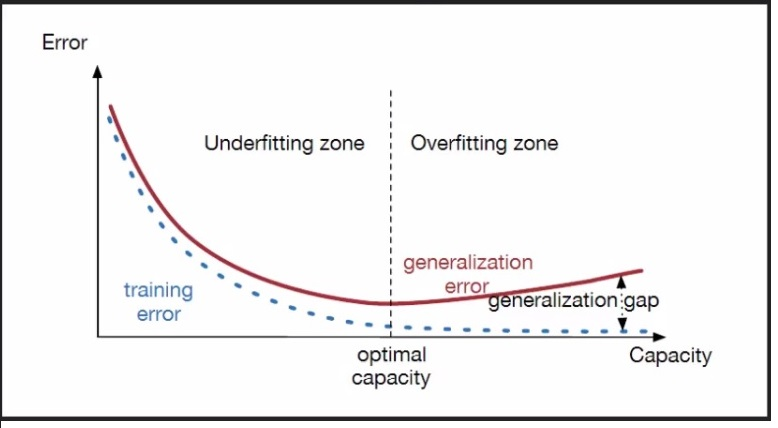

In [28]:
from IPython.display import Image
Image("/content/Over and UnderFitting.jpg", width=600)
# Overfitting: Acurácia elevada na predição sobre os dados de teste e treinamento
# Underfitting: Acurácia baixa na predição sobre os dados de teste e treinamento
# Modelo Ótimo: Acurácias relativamente altas, porém distintas entre o treinamento e teste